# Técnicas de reducción de la dimensionalidad

## 1. Librerias y datos

In [2]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
0,0,0.0,13.077658,2015.0,27.0,1.0,2.0,5.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,7.755577,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,0.0,13.077658,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Separamos la variable objetivo (is_canceled) de las demás.

In [4]:
x = data.iloc[:,1:26].values
y = data.iloc[:,0].values

## 2. Aplicación de PCA

El análisis de componentes principales, o PCA, es un método de reducción de la dimensionalidad que se utiliza a menudo para reducir la dimensionalidad de grandes conjuntos de datos, transformando un gran conjunto de variables en uno más pequeño que siga conteniendo la mayor parte de la información del conjunto grande.

La reducción del número de variables de un conjunto de datos se produce naturalmente a expensas de la precisión, pero el truco de la reducción de la dimensionalidad consiste en cambiar un poco de precisión por simplicidad. Porque los conjuntos de datos más pequeños son más fáciles de explorar y visualizar y hacen que el análisis de los datos sea mucho más fácil y rápido para los algoritmos de aprendizaje automático sin variables extrañas que procesar.

En resumen, la idea del PCA es sencilla: reducir el número de variables de un conjunto de datos, conservando la mayor cantidad de información posible


### Estandarizar

El objetivo de este paso es normalizar el rango de las variables continuas iniciales para que cada una de ellas contribuya por igual al análisis.

Más concretamente, la razón por la que es crítico realizar la estandarización antes del ACP, es que este último es bastante sensible respecto a las varianzas de las variables iniciales. Es decir, si hay grandes diferencias entre los rangos de las variables iniciales, aquellas variables con rangos más grandes dominarán sobre las que tienen rangos pequeños (Por ejemplo, una variable que oscila entre 0 y 100 dominará sobre una variable que oscila entre 0 y 1), lo que conducirá a resultados sesgados. Por lo tanto, la transformación de los datos a escalas comparables puede evitar este problema.

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

### Matriz de Covarianza

El objetivo de este paso es comprender cómo varían las variables del conjunto de datos de entrada con respecto a la media, o en otras palabras, ver si existe alguna relación entre ellas. Porque a veces, las variables están muy correlacionadas de tal manera que contienen información redundante. Así que, para identificar estas correlaciones, calculamos la matriz de covarianza.

In [6]:
cov_mat = np.cov(X_std.T)

### Autovectores y Autovalores

Los vectores propios y los valores propios son los conceptos de álgebra lineal que debemos calcular a partir de la matriz de covarianza para determinar los componentes principales de los datos. Antes de entrar en la explicación de estos conceptos, entendamos primero qué queremos decir con componentes principales.

Los componentes principales son nuevas variables que se construyen como combinaciones lineales o mezclas de las variables iniciales. Estas combinaciones se realizan de forma que las nuevas variables (es decir, los componentes principales) no están correlacionadas y la mayor parte de la información de las variables iniciales se exprime o comprime en los primeros componentes.


In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

Hacemos una lista de parejas (autovector, autovalor), las ordenamos.

In [8]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

Desde el punto de vista geométrico, los componentes principales representan las direcciones de los datos que explican una cantidad máxima de varianza, es decir, las líneas que capturan la mayor información de los datos. La relación entre la varianza y la información en este caso es que, cuanto mayor sea la varianza de una línea, mayor será la dispersión de los puntos de datos a lo largo de ella, y cuanto mayor sea la dispersión a lo largo de una línea, mayor será su información. Para simplificar todo esto, piense en los componentes principales como nuevos ejes que proporcionan el mejor ángulo para ver y evaluar los datos, de modo que las diferencias entre las observaciones sean más visibles.

A partir de los autovalores, calculamos la varianza explicada y representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada.

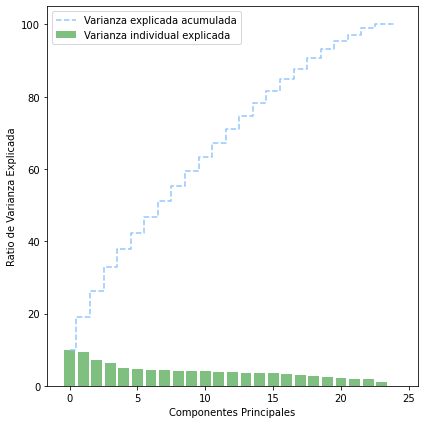

In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 6))

    plt.bar(range(25), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(25), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()



No hay grandes componentes que aporten mucha información, asi que vamos a quedarnos con las 18 primeras componentes de tal forma que así tenemos más del 80% de la información:

# REVISAR

In [19]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(x)

X_pca = pca.transform(x)

print(pca.explained_variance_ratio_)


[0.49420169 0.31190417]


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18',])

principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,-2.474984,0.780968,14.798547,0.198875,4.628477,-2.751210,-0.105307,-0.032650,0.333751,0.113394,-0.112809,-0.316944,1.379860,0.075490,-0.529825,-0.461486,0.595099,0.237123
1,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715
2,-2.288644,1.222566,14.790442,-4.079844,-0.926296,-0.041672,-0.138016,-0.045855,-0.844684,-0.173155,-1.308389,-0.191789,0.585394,0.525366,-0.036486,-0.208992,0.905597,0.151553
3,-2.477177,0.782790,14.786908,0.244327,3.335840,-3.564817,-0.233600,-0.436242,-0.631155,2.457818,-0.039006,-0.622743,1.104310,0.123546,-0.695594,-0.555218,-0.291966,0.042446
4,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-2.285838,-9.650028,-14.758504,7.063128,0.799854,-0.441390,-0.240094,-0.034821,-0.080276,0.132110,0.359551,-0.071191,-0.414918,0.104072,0.214385,0.452210,0.049069,-0.274382
29996,-2.435649,-9.796253,-14.779281,9.787888,-2.477276,-4.059625,20.181302,-2.789631,-0.263397,0.909008,0.813932,-0.362395,-0.667256,0.123934,-0.228444,-0.120673,0.162482,-0.118403
29997,-2.385286,-9.781181,-14.788718,8.762898,-0.080325,-1.164812,-0.340941,-0.703556,0.156871,2.999637,0.299346,-0.616559,-0.417735,-0.711078,-0.512739,0.097990,-0.106186,-0.184188
29998,-1.966802,-9.216735,-14.687010,1.441264,0.658197,-0.696161,-0.213911,0.211392,-1.180490,-0.303655,0.563471,0.399929,-0.966305,-0.567250,1.477813,-1.024491,-0.037409,0.066715


In [10]:
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis=1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,0
0,-2.474984,0.780968,14.798547,0.198875,4.628477,-2.751210,-0.105307,-0.032650,0.333751,0.113394,-0.112809,-0.316944,1.379860,0.075490,-0.529825,-0.461486,0.595099,0.237123,0
1,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715,1
2,-2.288644,1.222566,14.790442,-4.079844,-0.926296,-0.041672,-0.138016,-0.045855,-0.844684,-0.173155,-1.308389,-0.191789,0.585394,0.525366,-0.036486,-0.208992,0.905597,0.151553,2
3,-2.477177,0.782790,14.786908,0.244327,3.335840,-3.564817,-0.233600,-0.436242,-0.631155,2.457818,-0.039006,-0.622743,1.104310,0.123546,-0.695594,-0.555218,-0.291966,0.042446,3
4,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-2.285838,-9.650028,-14.758504,7.063128,0.799854,-0.441390,-0.240094,-0.034821,-0.080276,0.132110,0.359551,-0.071191,-0.414918,0.104072,0.214385,0.452210,0.049069,-0.274382,29995
29996,-2.435649,-9.796253,-14.779281,9.787888,-2.477276,-4.059625,20.181302,-2.789631,-0.263397,0.909008,0.813932,-0.362395,-0.667256,0.123934,-0.228444,-0.120673,0.162482,-0.118403,29996
29997,-2.385286,-9.781181,-14.788718,8.762898,-0.080325,-1.164812,-0.340941,-0.703556,0.156871,2.999637,0.299346,-0.616559,-0.417735,-0.711078,-0.512739,0.097990,-0.106186,-0.184188,29997
29998,-1.966802,-9.216735,-14.687010,1.441264,0.658197,-0.696161,-0.213911,0.211392,-1.180490,-0.303655,0.563471,0.399929,-0.966305,-0.567250,1.477813,-1.024491,-0.037409,0.066715,29998


Aunque después se realiza más en profundidad pruebas con TSNE, lo usamos ahora con las componentes principales que hemos calculado para ver los datos en dos dimensiones.

In [13]:
from sklearn.manifold import TSNE

Xs = TSNE(n_components=2, random_state=0).fit_transform(finalDf)

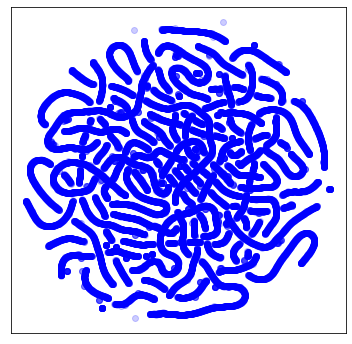

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(Xs[:, 0], Xs[:, 1], c = 'b', marker='o', alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show();

Vemos que el resultado obtenido no ha sido muy bueno ya que salen datos muy juntos y no podemos sacar grupos claros.

Pero es muy parecido al resultado obtenido con todas las variables en el punto "1. Aprendizaje no supervisado", por lo podríamos decir que el conjunto de datos se ve representado correctamente con estas componentes principales.

## 3. Aplicación de T-SNE

In [12]:
import seaborn as sns

data_subset = x
perplexity=[5,15,25,35,40]
for i in perplexity:
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    
    data['tsne-2d-one'] = tsne_results[:,0]
    data['tsne-2d-two'] = tsne_results[:,1]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="is_canceled",
        data=data,
        legend="full",
        alpha=0.3
    )
    plt.show()

NameError: name 'TSNE' is not defined